# 4.10 Task part 1C

# Contents

    01. Importing Libraries
    02. Importing Data
    03. Aggregation
    04. Additional Profiles across Regions and Departments
          Age group
          Departments by Region
          Customers with dependents
          Spender type
          Income level
          Baby/ Non-Baby Product Customers
          Orders by Price Range
          Family Status
          More Loyalty
          
        
        

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# creating path for import

path = r'/Users/bdigregorio/Desktop/CareerFoundry/' \
r'Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [3]:
# importing a new Orders_products_all.pkl to be based on high activity customers

Opa = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Opa.pkl'))

In [4]:
# check import
Opa.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,median_order_days,customer_type,Region,customer_activity,department,_merge,age_group,income_level,dependents,baby_product_buyer
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,20.0,Regular customer,Midwest,High_activity,beverages,both,Middle age,High income,HAS dependents,NOT a baby product buyer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,20.0,Regular customer,Midwest,High_activity,beverages,both,Middle age,High income,HAS dependents,NOT a baby product buyer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,20.0,Regular customer,Midwest,High_activity,beverages,both,Middle age,High income,HAS dependents,NOT a baby product buyer
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,26.0,Non-frequent customer,West,High_activity,beverages,both,Middle age,Lower,NO dependents,NOT a baby product buyer
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,26.0,Non-frequent customer,West,High_activity,beverages,both,Middle age,Lower,NO dependents,NOT a baby product buyer


# TASK CONT'D

# 03. Aggregation

In [5]:
# Task step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [6]:
Opa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31746924 entries, 0 to 31746923
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependents    int64   
 8   family_status           object  
 9   income                  int64   
 10  order_id                float64 
 11  order_number            float64 
 12  orders_day_of_the_week  float64 
 13  order_hour_of_day       float64 
 14  days_since_prior_order  float64 
 15  product_id              float64 
 16  add_to_cart_order       float64 
 17  reordered               float64 
 18  product_name            object  
 19  aisle_id                float64 
 20  department_id           float64 
 21  prices

In [7]:
# Aggregating 'age group' usage frequency and spending
Opa.groupby('age_group').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})


days_since_prior_order                 prices                
                                  max       mean  min    min      mean   max
age_group                                                                   
Middle age                       30.0  10.973965  0.0    1.0  7.795443  25.0
Older customer                   30.0  10.948468  0.0    1.0  7.801204  25.0
Young adult                      30.0  10.984262  0.0    1.0  7.790455  25.0

In [8]:
# aggregating Income 
Opa.groupby('income_level').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices                
                                max       mean  min    min      mean   max
income_level                                                              
High income                    30.0  10.901828  0.0    1.0  7.958466  25.0
Lower                          30.0  11.156271  0.0    1.0  7.294706  25.0
Lower-middle                   30.0  10.873918  0.0    1.0  7.959662  25.0
Upper-middle                   30.0  10.952648  0.0    1.0  7.966744  25.0

In [9]:
# aggregating dependents
Opa.groupby('dependents').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices                
                                  max       mean  min    min      mean   max
dependents                                                                  
HAS dependents                   30.0  10.977201  0.0    1.0  7.795985  25.0
NO dependents                    30.0  10.948229  0.0    1.0  7.794605  25.0

In [10]:
# aggregating department prices
Opa.groupby('department').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices                 
                                   max       mean  min    min       mean   max
department                                                                    
alcohol                           30.0  10.182362  0.0    1.0   8.148024  15.0
babies                            30.0   9.903656  0.0    1.0   7.636846  15.0
bakery                            30.0  10.964374  0.0    1.0   7.866585  15.0
beverages                         30.0  10.924077  0.0    1.0   7.682189  15.0
breakfast                         30.0  11.166020  0.0    1.0   8.065367  14.9
bulk                              30.0   9.992782  0.0    1.4   8.344153  14.1
canned goods                      30.0  11.498489  0.0    1.0   7.543893  15.0
dairy eggs                        30.0  10.860752  0.0    1.0   8.352254  15.0
deli                              30.0  11.213835  0.0    1.0   7.780964  15.0
dry goods pasta                   30.0  11.620956  0.0    1.0   7.349237  15.0
frozen                            30.0  11.587040  0.0    1.0   7.739921  15.0
household                         30.0  11.837895  0.0    1.0   7.382206  15.0
international                     30.0  11.134083  0.0    1.0   7.681567  15.0
meat seafood                      30.0  11.290819  0.0    8.0  16.297349  25.0
missing                           30.0  10.058726  0.0    1.0   8.662829  15.0
other                             30.0  10.803242  0.0    1.1   6.978592  15.0
pantry                            30.0  11.011688  0.0    1.0   8.011753  20.0
personal care                     30.0  11.438983  0.0    1.0   7.996461  15.0
pets                              30.0  11.732922  0.0    1.0   7.885385  15.0
produce                           30.0  10.726898  0.0    1.0   7.981664  15.0
snacks                            30.0  10.822261  0.0    1.6   4.275449   7.0

In [11]:
# aggregating baby product buyers
Opa.groupby('baby_product_buyer').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices  \
                                            max       mean  min    min   
baby_product_buyer                                                       
NOT a baby product buyer                   30.0  10.984316  0.0    1.0   
baby product buyer                         30.0   9.903656  0.0    1.0   

                                          
                              mean   max  
baby_product_buyer                        
NOT a baby product buyer  7.797756  25.0  
baby product buyer        7.636846  15.0

In [12]:
# aggregating regional info
Opa.groupby('Region').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices                
                             max       mean  min    min      mean   max
Region                                                                 
Midwest                     30.0  11.052119  0.0    1.0  7.797118  25.0
Northeast                   30.0  10.938600  0.0    1.0  7.786773  25.0
South                       30.0  10.973739  0.0    1.0  7.799394  25.0
West                        30.0  10.911468  0.0    1.0  7.795516  25.0

In [13]:
# aggregating loyal customer info
Opa.groupby('loyalty_flag').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                 prices                
                                    max       mean  min    min      mean   max
loyalty_flag                                                                  
Loyal customer                     30.0   6.112255  0.0    1.0  7.778456  25.0
New customer                       30.0  18.012152  0.0    1.0  7.805263  25.0
Regular customer                   30.0  12.438020  0.0    1.0  7.804054  25.0

In [14]:
# aggregating spender_type info
Opa.groupby('spender_type').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})


days_since_prior_order                 prices                 
                                max       mean  min    min       mean   max
spender_type                                                               
High spender                   30.0  10.985469  0.0   10.0  12.772903  25.0
Low spender                    30.0  10.971061  0.0    1.0   5.356149   9.9

In [15]:
# aggregating customer_type info
Opa.groupby('customer_type').agg({'days_since_prior_order': ['max', 'mean', 'min'], 'prices':['min', 'mean', 'max']})


days_since_prior_order                 prices            \
                                         max       mean  min    min      mean   
customer_type                                                                   
Frequent customer                       30.0   7.864202  0.0    1.0  7.795654   
Non-frequent customer                   30.0  23.040340  0.0    1.0  7.788027   
Regular customer                        30.0  15.544178  0.0    1.0  7.799131   

                             
                        max  
customer_type                
Frequent customer      25.0  
Non-frequent customer  25.0  
Regular customer       25.0

# 04. Profiles across Regions and Departments

# Age group

Age group/Region

In [16]:
# comparing age groups across Regions
age_region_cross = pd.crosstab(Opa['Region'], Opa['age_group'], dropna = False)

In [17]:
age_region_cross

age_group,Middle age,Older customer,Young adult
Region,,,
Midwest,3531235,1950917,1961573
Northeast,2576746,1522924,1505319
South,4956060,2778492,2838630
West,3828883,2149923,2146222


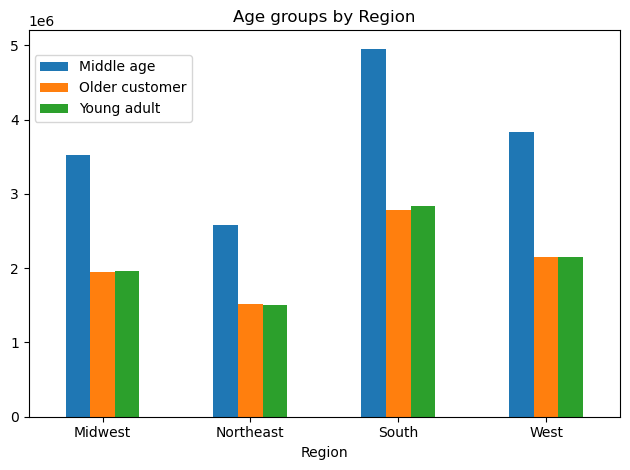

In [18]:
# create bar age_region
bar_age_region = age_region_cross.plot.bar()
plt.title('Age groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(-0.0015, 0.85))
plt.xticks(rotation=0)
plt.tight_layout()


In [19]:
# export bar_age_region'

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region_4-10-1C.png'))


Age group/Departments

In [20]:
# comparing age groups and departments
age_dept = pd.crosstab(Opa['department'], Opa['age_group'], dropna = False)

In [21]:
age_dept.head()

age_group,Middle age,Older customer,Young adult
department,,,
alcohol,69999,37841,41516
babies,200302,107908,109326
bakery,540846,304134,307297
beverages,1239419,700316,693415
breakfast,326477,181721,186906


<Figure size 1000x800 with 0 Axes>

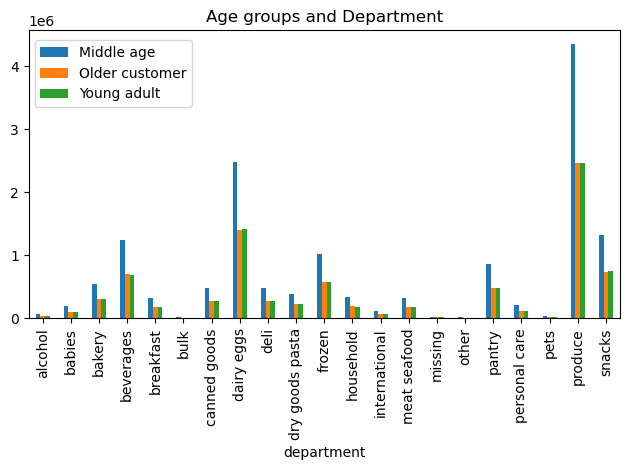

In [22]:
# create bar age_dept
plt.figure(figsize=(10, 8))
bar_age_dept = age_dept.plot.bar()
plt.title('Age groups and Department')
plt.legend(loc='center left', bbox_to_anchor=(-0.0015, 0.85))
plt.tight_layout()

In [23]:
# export bar_age_dept'
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_dept_4-10-1C.png'))

# Departments/Region

In [24]:
# comparing department across region
reg_dept =pd.crosstab(Opa['Region'], Opa['department'], dropna = False)

In [25]:
reg_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,35167,97509,268970,612877,161808,8070,244248,1242795,240495,198790,...,171648,62255,162438,16075,8190,431821,103284,21875,2183452,659920
Northeast,25838,74067,204951,473678,122220,5705,181990,937908,182738,148090,...,128224,45816,121692,11950,6439,321381,76834,18217,1631097,504555
South,50317,141606,382172,880300,231324,11338,347267,1766721,341885,280385,...,236731,86971,230234,22523,11916,607914,146609,30586,3097774,938233
West,38034,104354,296184,666295,179752,8898,267666,1360319,263589,218103,...,183484,67878,178318,16486,8858,470209,109783,24800,2376537,727059


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

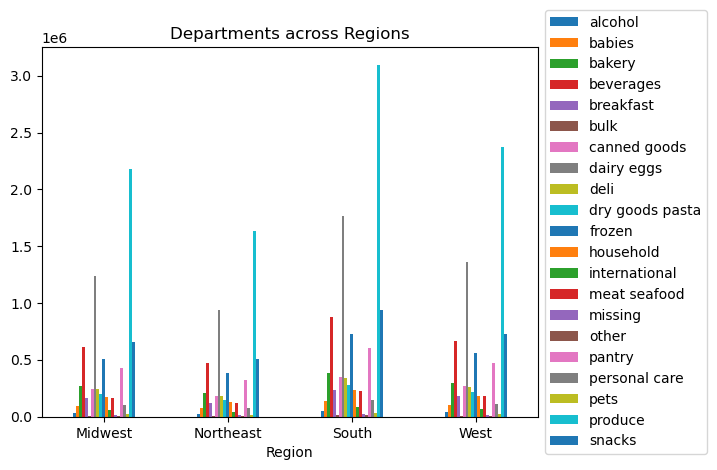

In [26]:
# create bar reg_dept
bar_reg_dept = reg_dept.plot.bar()
plt.title('Departments across Regions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)

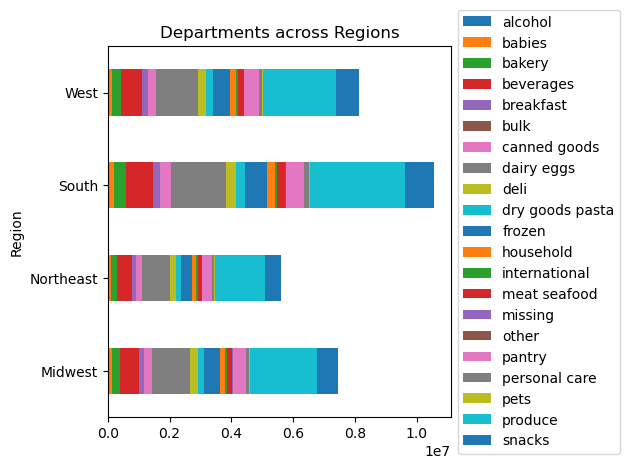

In [27]:
# create bar reg_dept
bar_reg_dept = reg_dept.plot.barh(stacked= True)
plt.title('Departments across Regions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)
plt.tight_layout()


In [28]:
# export bar_reg_dept'

bar_reg_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_dept_4-10-1C.png'))

# Customers with dependents

Customers with dependents across Region

In [29]:
# comparing customers with dependents across region
reg_dependents =pd.crosstab(Opa['Region'], Opa['dependents'], dropna = False)

In [30]:
reg_dependents

dependents,HAS dependents,NO dependents
Region,,
Midwest,5576153,1867572
Northeast,4215619,1389370
South,7925468,2647714
West,6095891,2029137


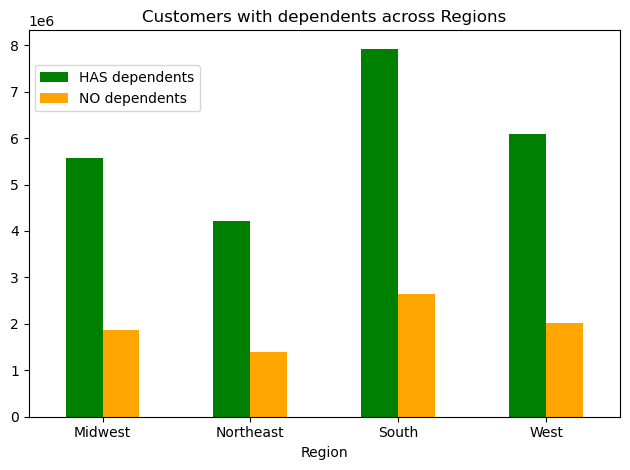

In [31]:
# create bar reg_dependents
bar_reg_dependents = reg_dependents.plot.bar(color = ['green', 'orange'])
plt.title('Customers with dependents across Regions')
plt.legend(loc='center left', bbox_to_anchor=(-0.0015, 0.85))
plt.xticks(rotation=0)
plt.tight_layout()


In [32]:
# export bar_reg_dependents

bar_reg_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_dependents_4-10-1C.png'))

Customers with dependents across Region

In [33]:
# comparing customers with dependents across departments
department_by_dependents =pd.crosstab(Opa['department'], Opa['dependents'], dropna = False)

In [34]:
department_by_dependents.head()

dependents,HAS dependents,NO dependents
department,,
alcohol,111307,38049
babies,312586,104950
bakery,863003,289274
beverages,1972482,660668
breakfast,522433,172671


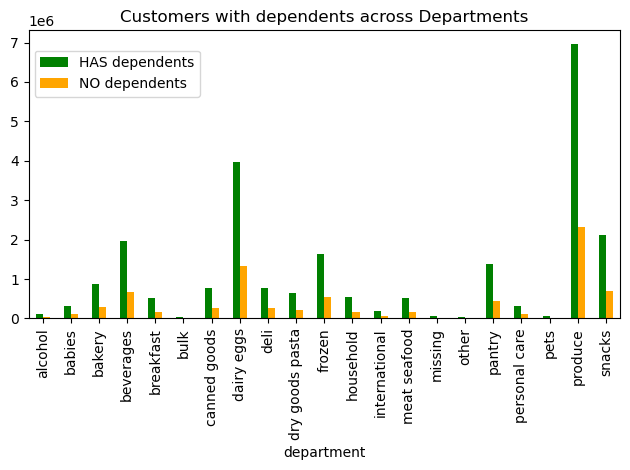

In [35]:
# create bar_reg_department_by_dependents
bar_department_by_dependents = department_by_dependents.plot.bar(color = ['green', 'orange'])
plt.title('Customers with dependents across Departments')
plt.legend(loc='center left', bbox_to_anchor=(-0.0015, 0.85))
plt.tight_layout()

In [36]:
# export bar_reg_dependents

bar_department_by_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_by_dependents_4-10-1C.png'))

In [37]:
Opa.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'family_status', 'income',
       'order_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'Most orders', 'max_order', 'loyalty_flag', 'avg_spent',
       'spender_type', 'median_order_days', 'customer_type', 'Region',
       'customer_activity', 'department', '_merge', 'age_group',
       'income_level', 'dependents', 'baby_product_buyer'],
      dtype='object')

# Spender type

Spender type across Region

In [40]:
# comparing  spender types across region
reg_spend_type =pd.crosstab(Opa['Region'], Opa['spender_type'], dropna = False)

In [41]:
reg_spend_type

spender_type,High spender,Low spender
Region,,
Midwest,2450459,4899087
Northeast,1839456,3699267
South,3482895,6965226
West,2671582,5357261


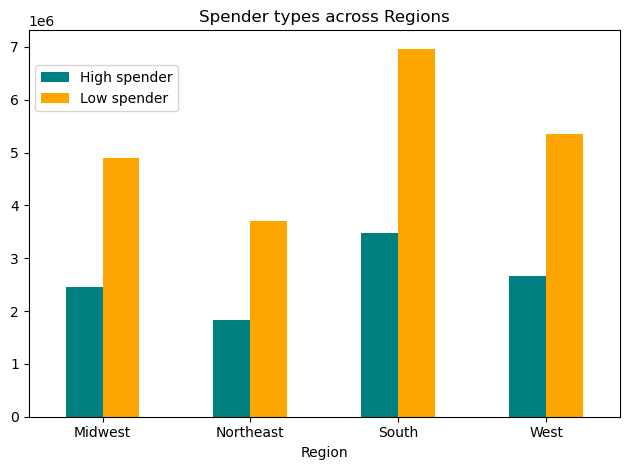

In [42]:
# create bar reg_spend_type
bar_reg_spend_type = reg_spend_type.plot.bar(color = ['teal', 'orange'])
plt.title('Spender types across Regions')
plt.legend(loc='center left', bbox_to_anchor=(-0.00015, 0.85))
plt.xticks(rotation=0)
plt.tight_layout()

In [43]:
# export bar_reg_spend_type
bar_reg_spend_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_spend_type_4-10-1C.png'))


Spender type across departments

In [44]:
# comparing  spender types across region
spend_type_dept =pd.crosstab(Opa['department'], Opa['spender_type'], dropna = False)

In [45]:
spend_type_dept.head()

spender_type,High spender,Low spender
department,,
alcohol,48778,91905
babies,122597,291962
bakery,380214,752399
beverages,851803,1744787
breakfast,292226,394446


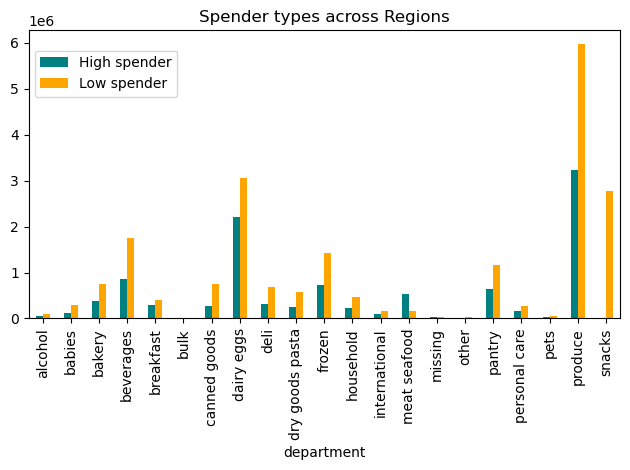

In [46]:
# create bar spend_type_dept
bar_spend_type_dept = spend_type_dept.plot.bar(color = ['teal', 'orange'])
plt.title('Spender types across Regions')
plt.legend(loc='center left', bbox_to_anchor=(-0.0015, 0.85))
plt.tight_layout()

In [47]:
# export bar_spend_type_dept
bar_spend_type_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_type_dept_4-10-1C.png'))

# Income level

Income level across Region

In [48]:
# comparing income levels across region
reg_income =pd.crosstab(Opa['Region'], Opa['income_level'], dropna = False)

In [49]:
reg_income

income_level,High income,Lower,Lower-middle,Upper-middle
Region,,,,
Midwest,2016678,1826998,1812698,1787351
Northeast,1508783,1393684,1381294,1321228
South,2783369,2646094,2692162,2451557
West,2161892,2027351,2013495,1922290


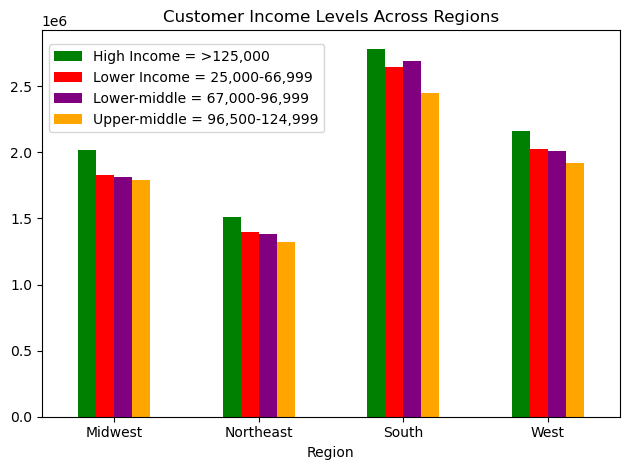

In [50]:
# create bar reg_income
bar_reg_income = reg_income.plot.bar(color= ['green', 'red','purple', 'orange'])
plt.title('Customer Income Levels Across Regions')
legend_labels = ['High Income = >125,000', 'Lower Income = 25,000-66,999', 'Lower-middle = 67,000-96,999', 'Upper-middle = 96,500-124,999']
legend = plt.legend(legend_labels, loc='center left', bbox_to_anchor=(0.0, 0.85))
plt.xticks(rotation=0)
plt.tight_layout()

In [51]:
# export bar reg_income
bar_reg_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_income_4-10-1C.png'))


Income level across Departments

In [52]:
# comparing income levels across departments
income_department =pd.crosstab(Opa['department'], Opa['income_level'], dropna = False)

In [53]:
income_department.head()

income_level,High income,Lower,Lower-middle,Upper-middle
department,,,,
alcohol,44151,38232,34062,32911
babies,115662,84780,112959,104135
bakery,317314,271656,288095,275212
beverages,674726,757550,613607,587267
breakfast,179999,193230,164569,157306


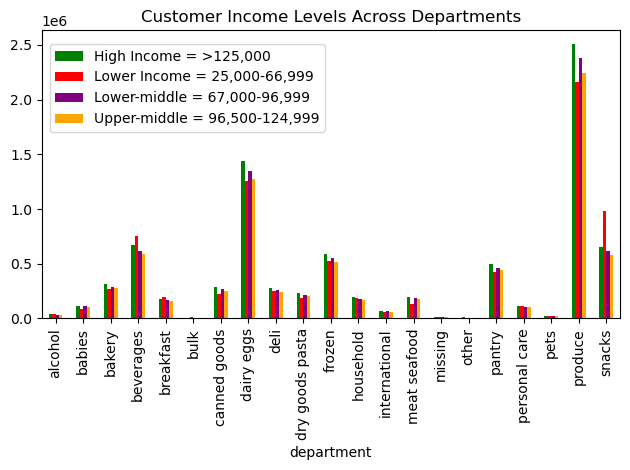

In [54]:
# create bar_income_department
bar_income_department = income_department.plot.bar(color= ['green', 'red','purple', 'orange'])
plt.title('Customer Income Levels Across Departments')
legend_labels = ['High Income = >125,000', 'Lower Income = 25,000-66,999', 'Lower-middle = 67,000-96,999', 'Upper-middle = 96,500-124,999']
legend = plt.legend(legend_labels, loc='center left', bbox_to_anchor=(0.0015, 0.8))
plt.tight_layout()

In [55]:
# export bar_income_department
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department_4-10-1C.png'))


# Baby/ Non-Baby Product Cutomers

Comparing Baby Product Customers/Non Baby Product Customers Across Regions

In [56]:
# comparing baby product buying customers across regions
reg_baby_cust =pd.crosstab(Opa['Region'], Opa['baby_product_buyer'], dropna = False)

In [57]:
reg_baby_cust

baby_product_buyer,NOT a baby product buyer,baby product buyer
Region,,
Midwest,7346216,97509
Northeast,5530922,74067
South,10431576,141606
West,8020674,104354


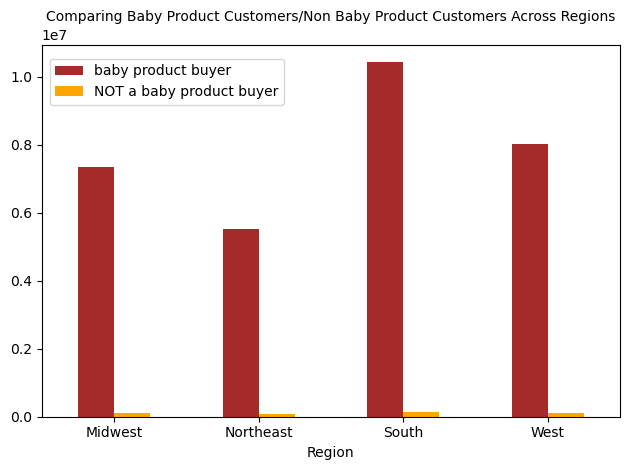

In [58]:
# create bar_reg_baby_cust
bar_reg_baby_cust = reg_baby_cust.plot.bar(color = ['brown', 'orange'])
plt.title('Comparing Baby Product Customers/Non Baby Product Customers Across Regions', fontsize=10)
legend_labels = ['baby product buyer', 'NOT a baby product buyer']
legend = plt.legend(legend_labels, loc='center left', bbox_to_anchor=(0.0015, 0.9))
plt.xticks(rotation=0)
plt.tight_layout()

In [59]:
# export bar_reg_baby_cust
bar_reg_baby_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_baby_cust_4-10-1C.png'))


In [60]:
# creating product price range column and bar

In [61]:
Opa['price_range_loc'].value_counts()

Low-range product     9910757
Mid-range product      570783
High-range product     408340
Name: price_range_loc, dtype: int64

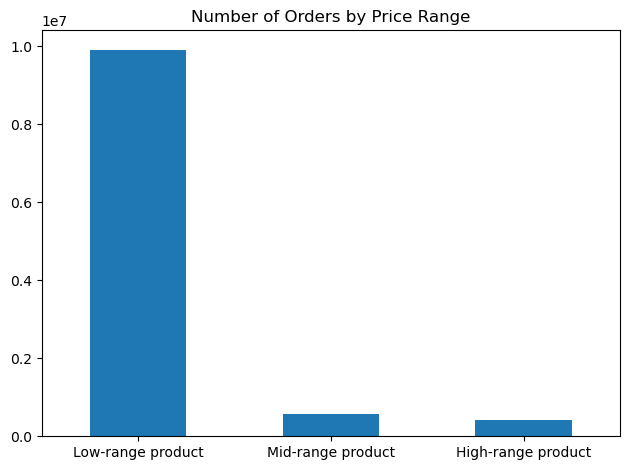

In [62]:
bar_price_range = Opa['price_range_loc'].value_counts().plot.bar()
plt.title('Number of Orders by Price Range')
plt.xticks(rotation=0)
plt.tight_layout()

In [63]:
# export bar_price_range
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_4-10-1C.png'))

# Family Status

In [64]:
Opa['family_status'].value_counts()

married                             22293220
single                               5218825
divorced/widowed                     2714968
living with parents and siblings     1519911
Name: family_status, dtype: int64

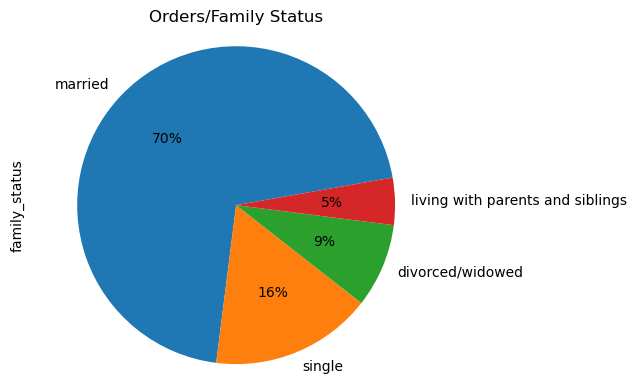

In [65]:
# create pie_family_status 
plt.figure(figsize=(6,4))
pie_family_status = Opa['family_status'].value_counts().plot.pie(autopct='%1.0f%%', startangle=10)
plt.axis('equal')
plt.title('Orders/Family Status')
plt.tight_layout()
plt.show()

In [66]:
# export pie_family_status 
pie_family_status .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_pie_4-10-1C.png'))


In [67]:
#  family status across departments
fam_stat_ord =pd.crosstab(Opa['family_status'], Opa['department'], dropna = False)

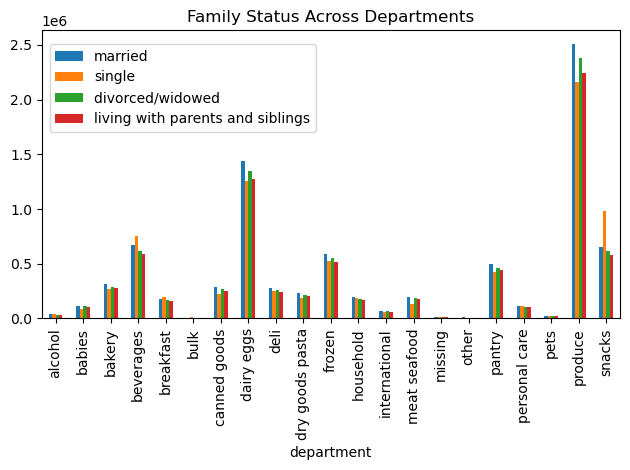

In [68]:
# create bar_fam_stat_ord
bar_fam_stat_ord = income_department.plot.bar()
plt.title('Family Status Across Departments')
legend_labels = ['married', 'single', 'divorced/widowed ', 'living with parents and siblings']
legend = plt.legend(legend_labels, loc='center left', bbox_to_anchor=(0.0015, 0.8))
plt.tight_layout()

In [69]:
# export bar_fam_stat_ord 
bar_fam_stat_ord.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_stat_ord_4-10-1C.png'))

In [70]:
Opa['age_group'].value_counts(dropna = False)

Middle age        14892924
Young adult        8451744
Older customer     8402256
Name: age_group, dtype: int64

# More Loyalty

In [71]:
#  crosstab loyalty_region
loyalty_region =pd.crosstab(Opa['loyalty_flag'], Opa['Region'], dropna = False)

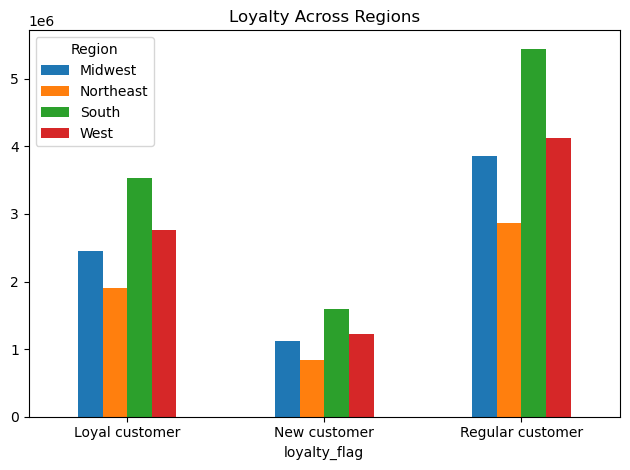

In [72]:
# create bar loyalty_region
bar_loyalty_region = loyalty_region.plot.bar()
plt.title('Loyalty Across Regions')
plt.xticks(rotation=0)
plt.tight_layout()

In [73]:
# export bar_loyalty_region 
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region_4-10-1C.png'))

In [74]:
#  crosstab loyalty_department
loyalty_region =pd.crosstab(Opa['loyalty_flag'], Opa['department'], dropna = False)

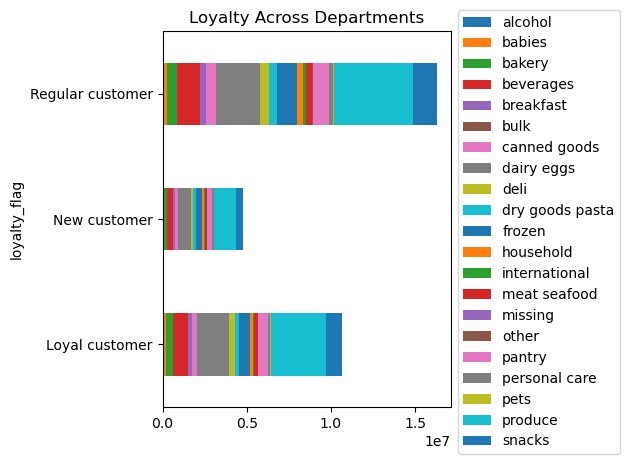

In [75]:
# create bar loyalty_department
bar_loyalty_department = loyalty_region.plot.barh(stacked=True)
plt.title('Loyalty Across Departments')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.075))
plt.tight_layout()

In [76]:
# export bar_loyalty_department
bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_department_4-10-1C.png'))